## Assignment: GIS Data Science for Climate in Nepal

In [37]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import geopandas as gpd
import seaborn as sns 
import rasterio

In [38]:
#Loading the datasets 
tif_20 = rasterio.open("/Users/mandiraghimire/Desktop/MghiGitManu/gis-data-science-assignment-Mandiraghi/nepal_temperature_2020.tif")
tif_50 = rasterio.open("/Users/mandiraghimire/Desktop/MghiGitManu/gis-data-science-assignment-Mandiraghi/nepal_temperature_2050.tif")

In [55]:
print(tif_20.descriptions)
print(tif_20.count)


('Month 1', 'Month 2', 'Month 3', 'Month 4', 'Month 5', 'Month 6', 'Month 7', 'Month 8', 'Month 9', 'Month 10', 'Month 11', 'Month 12')
12


In [39]:
# Read the raster data (1st Band)
temperature_2020_1 = tif_20.read(1)
temperature_2050_1 = tif_50.read(1)


In [40]:
#Shape of the datasets
print(temperature_2020_1.shape)
print(temperature_2050_1.shape)

(200, 400)
(200, 400)


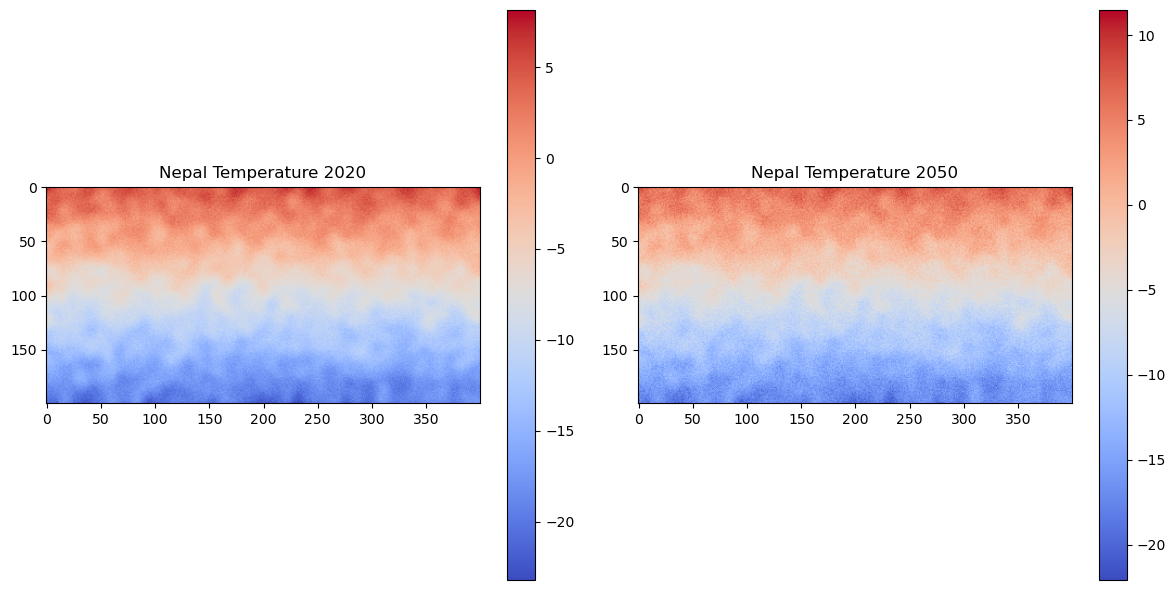

In [41]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

img1 = ax1.imshow(temperature_2020_1, cmap='coolwarm')
ax1.set_title("Nepal Temperature 2020")
plt.colorbar(img1, ax=ax1, orientation="vertical")

img2 = ax2.imshow(temperature_2050_1, cmap='coolwarm')
ax2.set_title("Nepal Temperature 2050")
plt.colorbar(img2, ax=ax2, orientation="vertical")

plt.tight_layout()
plt.show()


In [42]:

#Read the raster data (second band)
temperature_2020_2 = tif_20.read(2)
temperature_2050_2 = tif_50.read(2)


/var/folders/0x/xfw23x1n5xs85zjg_m86tyk80000gn/T/ipykernel_47750/943083670.py:5: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 4 Axes> than <Figure size 1200x600 with 3 Axes> which fig.colorbar is called on.
  plt.colorbar(img1, ax=ax1, orientation="vertical")
/var/folders/0x/xfw23x1n5xs85zjg_m86tyk80000gn/T/ipykernel_47750/943083670.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 4 Axes> than <Figure size 1200x600 with 4 Axes> which fig.colorbar is called on.
  plt.colorbar(img2, ax=ax2, orientation="vertical")


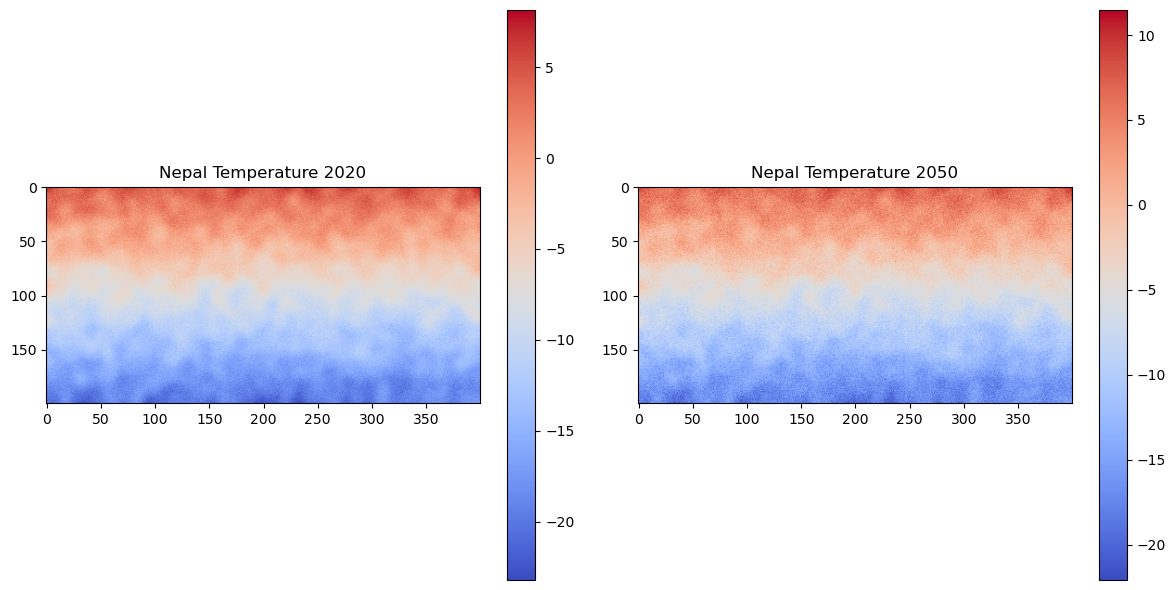

In [43]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

img3 = ax1.imshow(temperature_2020_2, cmap='coolwarm')
ax1.set_title("Nepal Temperature 2020")
plt.colorbar(img1, ax=ax1, orientation="vertical")

img4 = ax2.imshow(temperature_2050_2, cmap='coolwarm')
ax2.set_title("Nepal Temperature 2050")
plt.colorbar(img2, ax=ax2, orientation="vertical")

plt.tight_layout()
plt.show()


In [44]:
#Read the raster data (third band)
temperature_2020_3 = tif_20.read(3)
temperature_2050_3 = tif_50.read(3)

/var/folders/0x/xfw23x1n5xs85zjg_m86tyk80000gn/T/ipykernel_47750/980068880.py:5: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 4 Axes> than <Figure size 1200x600 with 3 Axes> which fig.colorbar is called on.
  plt.colorbar(img1, ax=ax1, orientation="vertical")
/var/folders/0x/xfw23x1n5xs85zjg_m86tyk80000gn/T/ipykernel_47750/980068880.py:9: UserWarning: Adding colorbar to a different Figure <Figure size 1200x600 with 4 Axes> than <Figure size 1200x600 with 4 Axes> which fig.colorbar is called on.
  plt.colorbar(img2, ax=ax2, orientation="vertical")


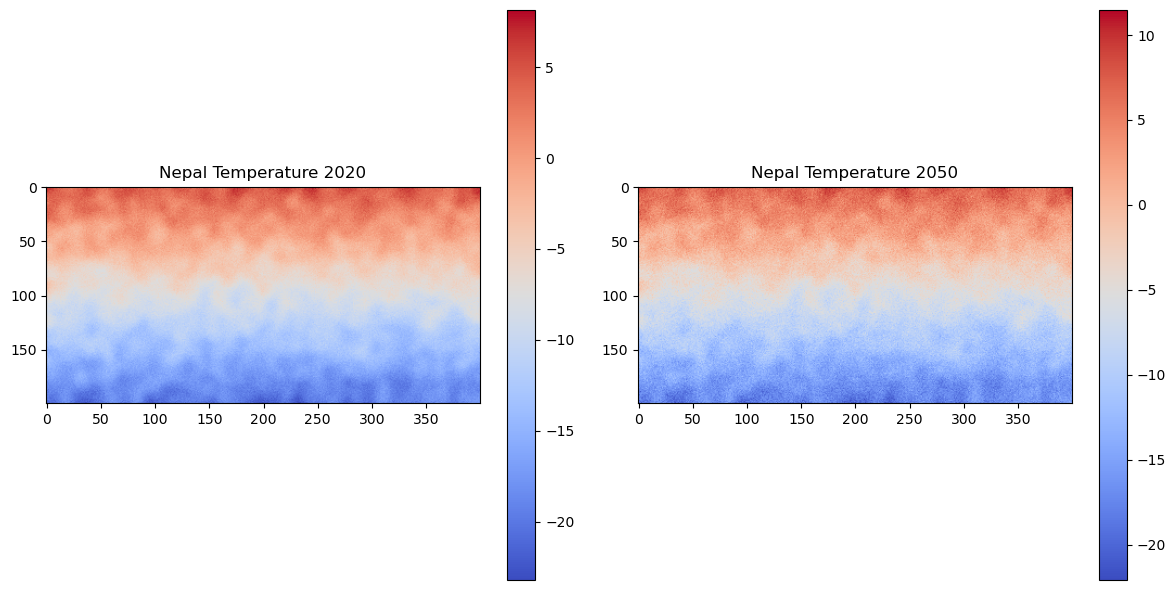

In [45]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

img3 = ax1.imshow(temperature_2020_3, cmap='coolwarm')
ax1.set_title("Nepal Temperature 2020")
plt.colorbar(img1, ax=ax1, orientation="vertical")

img4 = ax2.imshow(temperature_2050_3, cmap='coolwarm')
ax2.set_title("Nepal Temperature 2050")
plt.colorbar(img2, ax=ax2, orientation="vertical")

plt.tight_layout()
plt.show()

In [58]:
diff_band2 = temperature_2050_2 - temperature_2020_2
diff_band3 = temperature_2050_3 - temperature_2020_3
print(diff_band2)
print(diff_band3)

[[1.70355488 2.08404569 1.3579804  ... 1.22635214 1.66605201 2.67144526]
 [1.44073058 2.40607576 0.3989636  ... 1.35726446 1.04486159 1.77910133]
 [2.00989442 0.78278968 1.88592731 ... 1.31074293 3.13181146 1.95233951]
 ...
 [1.72141223 2.04967024 3.1945527  ... 1.50082543 2.10373281 2.46797292]
 [1.78998149 3.07815616 2.66980921 ... 2.05551287 2.7433743  1.22886716]
 [1.81479321 0.79921678 2.98032468 ... 2.26796432 3.07032501 3.15828707]]
[[1.45402354 2.33323289 1.88212292 ... 1.64330967 1.78374693 2.36869201]
 [2.19805475 2.09412531 0.59204082 ... 1.70981145 2.99492134 0.81837597]
 [1.07948091 2.29787919 2.07909736 ... 2.11770045 2.06773145 2.65338128]
 ...
 [1.32743696 1.38184875 3.14338179 ... 1.80753596 1.94033664 1.56508821]
 [2.52843405 3.23711275 1.81248487 ... 4.05802378 2.36408741 1.43235998]
 [2.92975588 1.12055932 3.0018681  ... 2.58163278 4.27191152 3.92274838]]


In [46]:
#Remove the datasets that has negative and Zero values 
temp_2020 = temperature_2020_1[temperature_2020_1 > 0]
temp_2050 = temperature_2050_1[temperature_2050_1 > 0]

In [47]:
#Statistical Summary 2020
print ("2020 Temperature Statistics: ")
print ("Min:", np.min(temp_2020))
print ("Max:", np.max(temp_2050))
print ("Mean:", np.mean(temp_2020))
print("Median:", np.median(temp_2020))

2020 Temperature Statistics: 
Min: 0.00013217561216161133
Max: 11.473132313566794
Mean: 2.5007613423051014
Median: 2.37874798210288


In [48]:
# Statistical Summary 2050
print ("2050 Temperature Statistics: ")
print ("Min:", np.min(temp_2050))
print ("Max:", np.max(temp_2050))
print ("Mean:", np.mean(temp_2050))
print ("Median:", np.median(temp_2050))

2050 Temperature Statistics: 
Min: 5.10130626188432e-05
Max: 11.473132313566794
Mean: 3.458761642167647
Median: 3.3539236081751973


In [53]:
q25 = np.percentile(temp_2020, 25)
q75 = np.percentile(temp_2020, 75)
print(f"Q1 (cool): < {q25:.2f}, Q3 (hot): > {q75:.2f}")

Q1 (cool): < 1.18, Q3 (hot): > 3.67


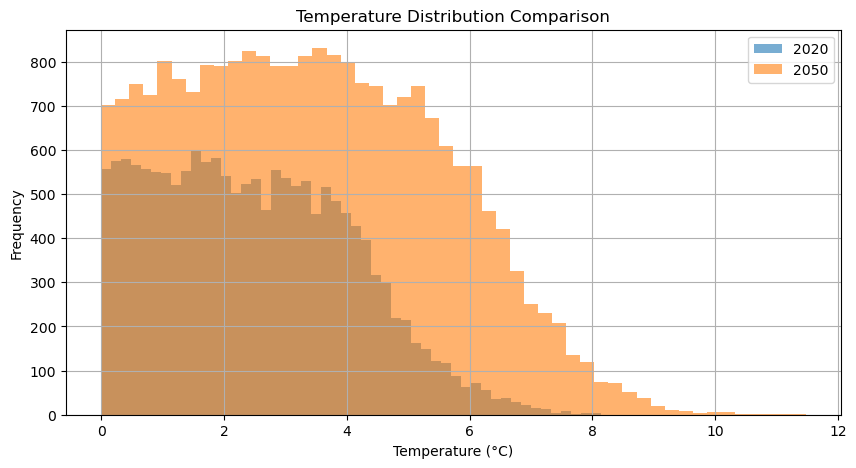

In [49]:
plt.figure(figsize=(10, 5))
plt.hist(temp_2020.flatten(), bins=50, alpha=0.6, label="2020")
plt.hist(temp_2050.flatten(), bins=50, alpha=0.6, label="2050")
plt.title("Temperature Distribution Comparison")
plt.xlabel("Temperature (°C)")
plt.ylabel("Frequency")
plt.legend()
plt.grid(True)
plt.show()


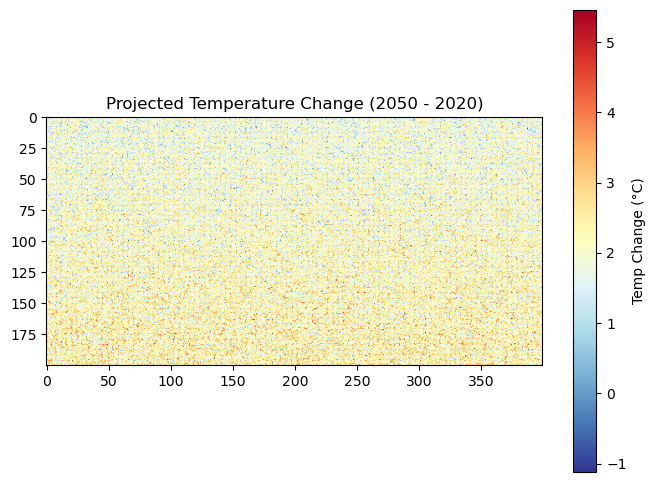

In [54]:
temp_diff = temperature_2050_1 - temperature_2020_1
plt.figure(figsize=(8,6))
plt.imshow(temp_diff, cmap='RdYlBu_r')
plt.colorbar(label='Temp Change (°C)')
plt.title('Projected Temperature Change (2050 - 2020)')
plt.show()

In [59]:
#Check quantitaive shift : Pixel Counts by Temperature Class
bins = [0, 2, 4, 6, 8, 10, 12]
hist_2020 = np.histogram(temp_2020, bins=bins)[0]
hist_2050 = np.histogram(temp_2050, bins=bins)[0]

for i in range(len(bins)-1):
    print(f"{bins[i]}–{bins[i+1]}°C: 2020 → {hist_2020[i]}, 2050 → {hist_2050[i]}")


0–2°C: 2020 → 6915, 2050 → 6532
2–4°C: 2020 → 6296, 2050 → 7076
4–6°C: 2020 → 2737, 2050 → 6018
6–8°C: 2020 → 306, 2050 → 2629
8–10°C: 2020 → 4, 2050 → 296
10–12°C: 2020 → 0, 2050 → 15


# Conclusion and Analysis: 

Temperature Distribution: The histogram shows a clear rightward shift from 2020 to 2050, implying an increase in overall temperatures.

Heatmap Patterns: From red (hotter) expanding areas and cooler areas fading, we can infer warming across lowland and mid-hill zones.

Difference Map: A significant portion of Nepal is warming by 2°C to 5°C, which could impact agriculture, water supply, and glacier melt.

The number of pixels in the 4–8°C range has more than doubled, indicating widespread moderate warming.